# Fisher's Iris data

In [1]:
usePackage <- function(p) 
{
  if (!is.element(p, installed.packages()[,1]))
    install.packages(p, repos = "https://cran.itam.mx/")
  suppressPackageStartupMessages(require(p, character.only = TRUE, quietly  = TRUE))
}

In [2]:
usePackage('ggplot2')
usePackage('dplyr')
usePackage('GGally')

In [3]:
head(iris)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa


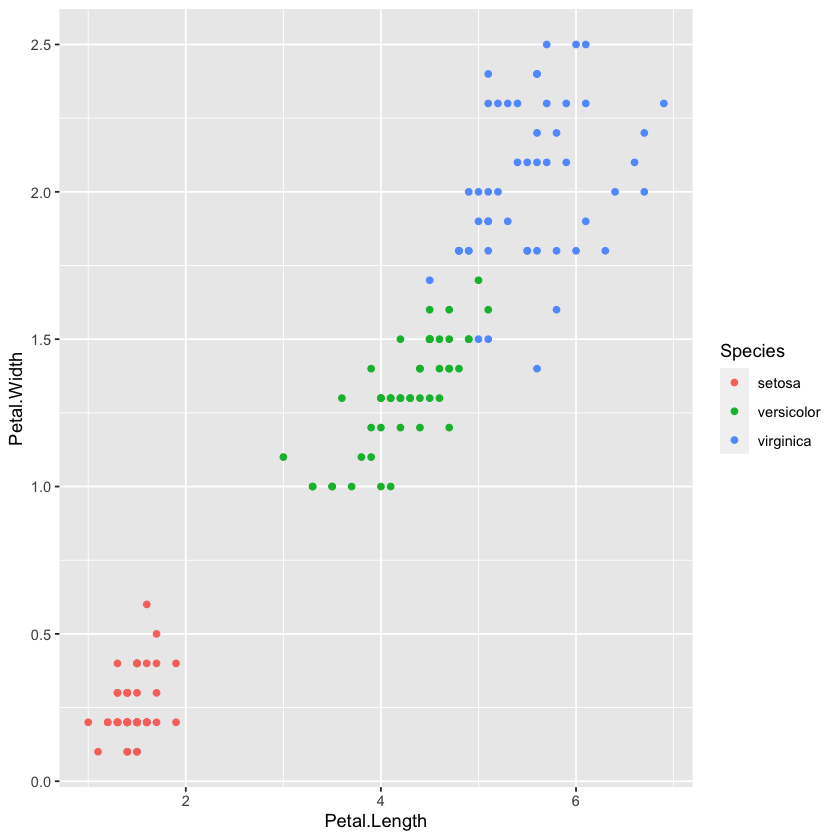

In [4]:
ggplot(iris) + geom_point(aes(y=Petal.Width, x=Petal.Length, color=Species))

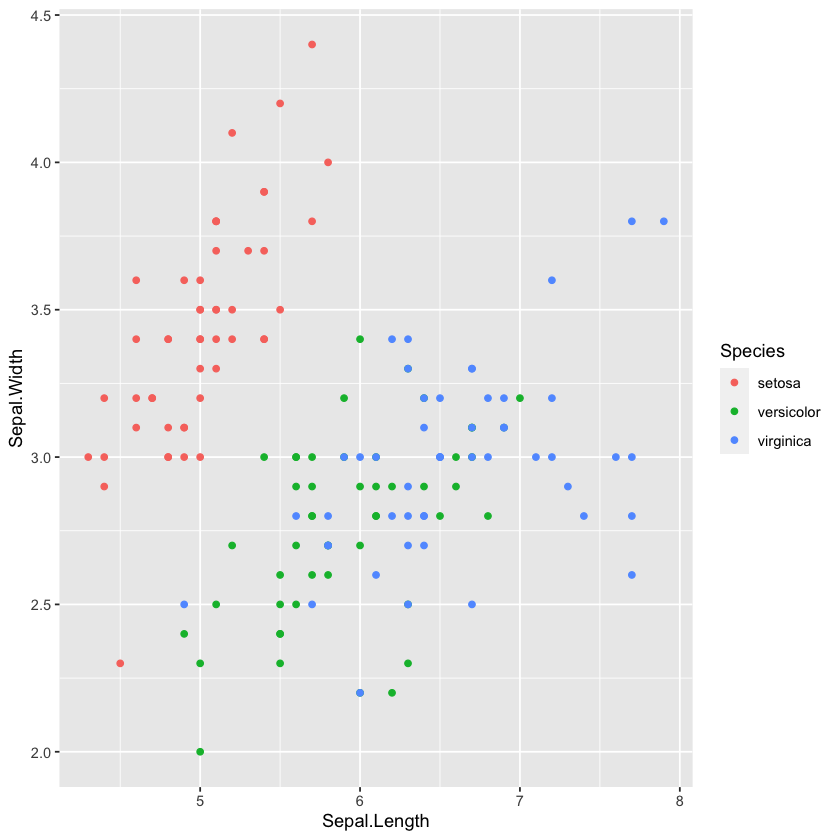

In [5]:
ggplot(iris) + geom_point(aes(y=Sepal.Width, x=Sepal.Length, color=Species))

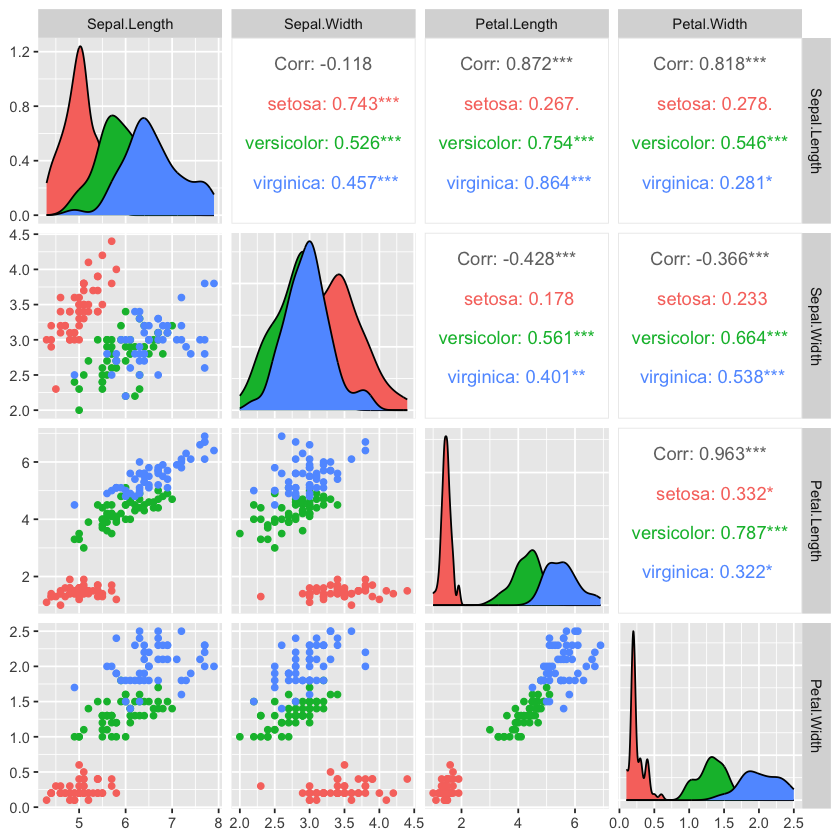

In [6]:
iris %>% 
     select(-Species) %>% 
     ggpairs(aes(color=iris$Species))

# Tarea

1. Crear una función que calcule la estimación de la probabilidad a-priori para una clase. (2 puntos)

Nombre de función: apriori

Parámetros: 

a) Data frame con los datos

b) Nombre de la columna que contiene la clase a predecir

c) Clase sobre la que se calculará estimación de la probabilidad a-priori

Regresa:
Probabilidad a-priori



In [7]:
apriori <- function(df_datos, nomColumnaClase = 'Species', clase)
{
    total  <- nrow(df_datos)
    df <- subset(df_datos, select=nomColumnaClase)
    df <- df[df==clase]
    return (length(df)/total)
    
}

In [8]:
apriori(iris, ,'virginica')

[1] 0.3333333


2. Crear una función que calcule la estimación de la media del PDF para una clase. (2 puntos)

Nombre de función: media

Parámetros: 

a) Data frame con los datos

b) Nombre de la columna que contiene la clase a predecir

c) Lista con los nombres de las variables independientes con los que se calculará la media. 

d) Clase sobre la que se calculará la estimación de la media

Regresa:

Vector con la media donde cada elemento mantiene el mismo orden de la lista de las variables independientes que se pasaron como parámetro

In [9]:
media <- function(df_datos, nomColumnaClase = 'Species', listaNom, clase)
{
    total  <- nrow(df_datos)
    n <- apriori(df_datos, ,clase)*total
    medias <- lapply(listaNom, 
                    function (p) sum(df_datos[grep(clase, df_datos[,nomColumnaClase]), p])/n) 
    return (medias)
    
}

In [10]:
media(iris, ,colnames(iris)[1:4],'setosa')

[[1]]
[1] 5.006

[[2]]
[1] 3.428

[[3]]
[1] 1.462

[[4]]
[1] 0.246

In [11]:
summary(iris[grep('setosa',iris$Species),])

  Sepal.Length    Sepal.Width     Petal.Length    Petal.Width   
 Min.   :4.300   Min.   :2.300   Min.   :1.000   Min.   :0.100  
 1st Qu.:4.800   1st Qu.:3.200   1st Qu.:1.400   1st Qu.:0.200  
 Median :5.000   Median :3.400   Median :1.500   Median :0.200  
 Mean   :5.006   Mean   :3.428   Mean   :1.462   Mean   :0.246  
 3rd Qu.:5.200   3rd Qu.:3.675   3rd Qu.:1.575   3rd Qu.:0.300  
 Max.   :5.800   Max.   :4.400   Max.   :1.900   Max.   :0.600  
       Species  
 setosa    :50  
 versicolor: 0  
 virginica : 0  
                
                
                

3. Crear una función que calcule la estimación de la varianza/covarianza del PDF para todos los datos. (se asume que todas las variables independientes poseen la misma varianza/covarianza). (2 puntos)

Nombre de función: var.covar

Parámetros: 

a) Data frame con los datos

b) Lista con los nombres de las variables independientes con los que se calculará la estimación de la varianza/covarianza

c) Lista con la media de las variables independientes con los que se calculará la estimación de la varianza/covarianza con el mismo orden de la lista de las variables independientes del inciso anterior

Regresa:

Valor o Matriz con la  varianza/covarianza donde cada columna mantiene el mismo orden de la lista de las variables independientes que se pasaron como parámetro


In [12]:
#modificar esto

#var.covar <- function(df_datos, listaNom, listaMedias){
#    clases <- length(unique(c(df_datos$Species)))
#    total  <- nrow(df_datos)
#    m <- length(listaNom)
#    var <- lapply(listaNom, 
#                function (p) sum((df_datos[, p]-as.numeric(listaMedias[match(p,listaNom)]))^2)/(total-clases))#-as.numeric(listaMedias[match(p,listaNom)])))#/(total-clases))
#    var.covar <- diag(var,m,m)
#    colnames(var.covar) <- listaNom
#    return(var.covar)          
#}

In [13]:
var.covar <- function(df_datos, listaNom, listaClases){
    m <- length(listaNom)
    matriz <- matrix(0,m,m)
    for (i in listaClases){
        df_aux <- df_datos[grep(i, df_datos$Species),]
        medias <- media(df_datos, ,listaNom,i)
        var <- lapply(listaNom, 
                function (p) sum((df_aux[, p]-as.numeric(medias[match(p,listaNom)]))^2))
        matriz <- matriz+diag(var,m,m)
    }
    var.covar <- matriz*(1/(nrow(df_datos)-length(listaClases)))            
    colnames(var.covar) <- listaNom
    return(var.covar)          
}

In [14]:
var.covar(iris,colnames(iris)[1:4],unique(iris$Species))

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0.2650082,0.0000000,0.0000000,0.00000000
0.0000000,0.1153878,0.0000000,0.00000000
0.0000000,0.0000000,0.1851878,0.00000000
0.0000000,0.0000000,0.0000000,0.04188163


4. Crear una función que calcule el discriminante para una clase dada. (2 puntos)

Nombre de función: delta

Parámetros: 

a) Vector numérico X con los valores a clasificar. Deben proporcionarse en el mismo orden con el que se estimaron la media y la varianza/covarianza 

b) probabilidad a-priori estimada para esa clase

c) Media estimada para esa clase

e) varianza/covarianza estimada

Regresa:
Valor del discriminante para la clase dada

In [15]:
delta <- function(x,a_priori,media,var.covar){
    x <- as.numeric(x)
    media <- as.numeric(media)
    return (t(x)%*%solve(var.covar)%*%media-(1/2)*t(media)%*%solve(var.covar)%*%media+log(a_priori)) 
}

In [16]:
delta(c(5.1,3.5,1.4,0.2),.333333,media(iris, ,colnames(iris)[1:4],'setosa'),var.covar(iris,colnames(iris)[1:4],unique(iris$Species)))




106.7519


In [17]:
delta(c(5.1,3.5,1.4,0.2),.333333,media(iris, ,colnames(iris)[1:4],'virginica'),var.covar(iris,colnames(iris)[1:4],unique(iris$Species)))


15.09942


5) Crear una que función que clasifique una observación (1 punto)

Nombre de función: clasifica

Parámetros: 

a) Vector numérico X con los valores a clasificar. Deben proporcionarse en el mismo orden con el que se estimaron la media y la varianza/covarianza 

b) Lista de listas de parámetros por cada clase: La lista deberá contener la probabilidad a-priori, promedio.

c) matriz de varianzas y covarianzas

Ejemplo de lista:

lista <-  list(clase1=list(apriori=1,mean=c(2,3)), clase2=list(apriori=4,mean=c(5,7)))

Para acceder la media de la clase1:

    lista$clase1$var   
    o
    lista[["clase1"]][["mean"]]
    o
    lista[[1]][[3]]

    Número de clases:
    length(lista)

Regresa:
Clase a la que pertenece la observación

In [18]:
clasifica  <- function(x,listaClases,var.cov){
    n <- length(listaClases)
    delta_clases  <- rep(0,n)
    for (i in 1:n){
        a_priori <- listaClases[[i]][[1]]
        medias <- listaClases[[i]][[2]]
        delta_clases[i] <- delta(x,a_priori,medias,var.cov)
    } 
    nombres_clases <- names(lista)
    return (nombres_clases[match(max(delta_clases),delta_clases)])
}

In [19]:
lista <- list(setosa=list(apriori=.3333333,mean=media(iris, ,colnames(iris)[1:4],'setosa')), 
              virginica=list(apriori=.333333,mean=media(iris, ,colnames(iris)[1:4],'virginica')))



In [20]:
clasifica(c(5.1,3.5,1.4,0.2),lista,
          var.covar(iris,colnames(iris)[1:4],unique(iris$Species)))



[1] "setosa"

In [21]:
clasifica(c(5.6,2.8,4.9,2.0),lista,
          var.covar(iris,colnames(iris)[1:4],unique(iris$Species)))
                                             
                                             

[1] "virginica"

6) Las estimaciones se realizarán sobre una muestra aleatoria del 80% de la base iris que se encuentra en R.  Se probará el 20% restante con la función clasifica. Se comparará la predicción contra la clase real y se reportará el porcentaje de aciertos (aquellas predicciones que sean idénticas a la clase real de la observación). Hay que realizar esta prueba con distintas variables independientes, tomando 1 o más de ellas. ¿Cómo afecta esto la predicción? (1 punto) (esto es sacar la matriz de varianza y de medias con el 80% de los datos)

In [22]:
df_iris <- sample_n(iris,nrow(iris))
df_iris_prueba <- df_iris[1:(nrow(df_iris)*.8),]
df_iris_test  <-  df_iris[(nrow(df_iris_prueba)+1):nrow(df_iris),]

In [23]:
var.covar <- var.covar(iris,colnames(iris)[1:4],unique(iris$Species)) #checarrrrrrrrrrr

In [24]:
lista <- list(setosa=list(apriori=apriori(df_iris_test, ,'setosa'),mean=media(iris, ,colnames(iris)[1:4],'setosa')), 
              virginica=list(apriori=apriori(df_iris_test, ,'virginica'),mean=media(iris, ,colnames(iris)[1:4],'virginica')),
             versicolor=list(apriori=apriori(df_iris_test, ,'versicolor'),mean=media(iris, ,colnames(iris)[1:4],'versicolor')))


In [25]:
resultado <- function(df_test,lista,listaVariables,var.covar){
    df_test1 <- df_test[,1:ncol(df_iris_test)-1]
    x <- c(1:nrow(df_test1))
    for (i in 1:nrow(df_test1)){
        aux <- df_test1[i,]
        x[i] <- clasifica(c(aux),lista,var.covar)
    }
    return (table(x==df_test[,ncol(df_test)]))
}

In [26]:
resultado(df_iris_test, lista, colnames(df_iris_test)[1:4],var.covar)


FALSE  TRUE 
    2    28 